In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install -U tensorflow==2.2.0-rc2

# **References** -
https://towardsdatascience.com/build-a-handwritten-text-recognitionsystem-using-tensorflow-2326a3487cd5

https://theailearner.com/2019/05/29/creating-a-crnn-model-to-recognize-text-in-an-image-part-1/

# **Loading and Processing the Parser text file**

In [3]:
parser_content = ''
with open('/content/gdrive/MyDrive/Mid_Term_Project_Inputs/parser.txt','r') as my_file:
  parser_content = my_file.read()

print(parser_content[:100])

a01-000u-00-00 ok 154 408 768 27 51 AT A
a01-000u-00-01 ok 154 507 766 213 48 NN MOVE
a01-000u-00-02


In [4]:
parser_rows = parser_content.split('\n')
parser_rows[:48]

['a01-000u-00-00 ok 154 408 768 27 51 AT A',
 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE',
 'a01-000u-00-02 ok 154 796 764 70 50 TO to',
 'a01-000u-00-03 ok 154 919 757 166 78 VB stop',
 'a01-000u-00-04 ok 154 1185 754 126 61 NPT Mr.',
 'a01-000u-00-05 ok 154 1438 746 382 73 NP Gaitskell',
 'a01-000u-00-06 ok 154 1896 757 173 72 IN from',
 'a01-000u-01-00 ok 156 395 932 441 100 VBG nominating',
 'a01-000u-01-01 ok 156 901 958 147 79 DTI any',
 'a01-000u-01-02 ok 156 1112 958 208 42 AP more',
 'a01-000u-01-03 ok 156 1400 937 294 59 NN Labour',
 'a01-000u-01-04 ok 156 1779 932 174 63 NN life',
 'a01-000u-01-05 ok 156 2008 933 237 70 NNS Peers',
 'a01-000u-02-00 ok 157 408 1106 65 70 BEZ is',
 'a01-000u-02-01 ok 157 541 1118 72 54 TO to',
 'a01-000u-02-02 ok 157 720 1114 113 63 BE be',
 'a01-000u-02-03 ok 157 916 1136 281 46 VBN made',
 'a01-000u-02-04 ok 157 1281 1117 80 59 IN at',
 'a01-000u-02-05 ok 157 1405 1140 64 35 AT a',
 'a01-000u-02-06 ok 157 1544 1115 339 96 NN meeting',
 'a

In [5]:
column_list = ['Image_Name','Status','Col1','Col2','Col3','Col4','Col5','POS','Word','Add1','Add2']

In [6]:
parser_list = []
for x in parser_rows:
  parts = x.split()
  parser_list.append(parts)

parser_list[0:5]

[['a01-000u-00-00', 'ok', '154', '408', '768', '27', '51', 'AT', 'A'],
 ['a01-000u-00-01', 'ok', '154', '507', '766', '213', '48', 'NN', 'MOVE'],
 ['a01-000u-00-02', 'ok', '154', '796', '764', '70', '50', 'TO', 'to'],
 ['a01-000u-00-03', 'ok', '154', '919', '757', '166', '78', 'VB', 'stop'],
 ['a01-000u-00-04', 'ok', '154', '1185', '754', '126', '61', 'NPT', 'Mr.']]

In [7]:
import pandas as pd

parser_dataset = pd.DataFrame(parser_list[:], columns = column_list)
print(parser_dataset)

            Image_Name Status Col1  Col2  Col3  ... Col5   POS    Word  Add1  Add2
0       a01-000u-00-00     ok  154   408   768  ...   51    AT       A  None  None
1       a01-000u-00-01     ok  154   507   766  ...   48    NN    MOVE  None  None
2       a01-000u-00-02     ok  154   796   764  ...   50    TO      to  None  None
3       a01-000u-00-03     ok  154   919   757  ...   78    VB    stop  None  None
4       a01-000u-00-04     ok  154  1185   754  ...   61   NPT     Mr.  None  None
...                ...    ...  ...   ...   ...  ...  ...   ...     ...   ...   ...
115315   r06-143-04-06     ok  186  1323  1428  ...   77  PP3O     him  None  None
115316   r06-143-04-07     ok  186  1458  1469  ...   52    IN      in  None  None
115317   r06-143-04-08     ok  186  1532  1445  ...   72   ATI     the  None  None
115318   r06-143-04-09     ok  186  1654  1444  ...  114    NN  garden  None  None
115319   r06-143-04-10     ok  186  1892  1453  ...   66     ?       ?  None  None

[11

**For some rows we have additional data columns which will cause problem later,**
**We will remove these rows later in the code**

In [8]:
parser_dataset.loc[parser_dataset['Add1'].notnull()]

,Image_Name,Status,Col1,Col2,Col3,Col4,Col5,POS,Word,Add1,Add2
22,a01-000u-03-00,err,156,430,1290,177,59,NPTS,M,Ps,None
47,a01-000u-06-02,ok,159,878,1825,160,68,NPT,M,P,None
74,a01-000x-02-03,ok,181,1090,1110,207,76,NPTS,0M,Ps,None
99,a01-000x-05-00,ok,173,393,1635,190,85,NPT,0M,P,None
117,a01-003-01-04,ok,176,1252,1102,222,52,NPTS,M,Ps,None
135,a01-003-03-07,ok,176,1855,1454,211,50,NPTS,M,Ps,None
198,a01-003u-02-00,ok,161,356,1174,181,78,NPTS,M,Ps,None
217,a01-003u-04-04,ok,161,1324,1515,205,75,NPTS,M,Ps,None
278,a01-003x-01-04,ok,176,1262,1065,211,85,NPTS,0M,Ps,None
296,a01-003x-03-05,err,169,1208,1426,225,84,NPTS,0M,Ps,None


In [9]:
parser_dataset.loc[parser_dataset['Add2'].notnull()]

,Image_Name,Status,Col1,Col2,Col3,Col4,Col5,POS,Word,Add1,Add2
28926,c04-039-01-07,ok,195,1818,899,317,107,NP$,A,T,V's
29120,c04-050-06-11,ok,169,2096,1841,258,76,NP,B,B,C
29965,c04-122-03-11,err,176,1919,1485,112,47,NP,B,B,C
30028,c04-128-00-11,ok,177,1733,760,194,81,NP,B,B,C
30070,c04-128-05-05,err,175,1547,1657,203,86,NP,B,B,C
30091,c04-128-07-09,err,179,1743,2007,183,80,NP,B,B,C
30136,c04-134-02-10,err,189,1415,1100,161,86,NP,I,T,V
30169,c04-134-06-01,ok,186,379,1839,122,59,NP,B,B,C
30214,c04-139-03-00,ok,189,275,1307,131,63,NP,I,T,V
30295,c04-144-04-04,err,182,1258,1428,260,86,NP$,I,T,V's


### **Create a dataframe with path which will be concatenated to above dataframe**

In [10]:
path_list = parser_dataset.iloc[:, 0].to_list()
path_list[0:5]

['a01-000u-00-00',
 'a01-000u-00-01',
 'a01-000u-00-02',
 'a01-000u-00-03',
 'a01-000u-00-04']

In [11]:
index = 0
path_list_updated = []
for x in path_list:
  path_list_updated.append(x.split('-')[0] + '/' + x.split('-')[0] + '-' + x.split('-')[1])

path_list_updated[0:5]

['a01/a01-000u',
 'a01/a01-000u',
 'a01/a01-000u',
 'a01/a01-000u',
 'a01/a01-000u']

In [12]:
path_column_list = ['Path']

In [13]:
path_df = pd.DataFrame(path_list_updated[:], columns = path_column_list)
path_df.head()

,Path
0,a01/a01-000u
1,a01/a01-000u
2,a01/a01-000u
3,a01/a01-000u
4,a01/a01-000u


In [14]:
path_df['Path'] = '/content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/' + path_df['Path']
path_df['Path'].head()

0    /content/gdrive/MyDrive/Mid_Term_Project_Input...
1    /content/gdrive/MyDrive/Mid_Term_Project_Input...
2    /content/gdrive/MyDrive/Mid_Term_Project_Input...
3    /content/gdrive/MyDrive/Mid_Term_Project_Input...
4    /content/gdrive/MyDrive/Mid_Term_Project_Input...
Name: Path, dtype: object

### **Dataframe with actual path**

In [15]:
parser_dataset = pd.concat((parser_dataset,path_df), axis = 1)
parser_dataset.head()

,Image_Name,Status,Col1,Col2,Col3,Col4,Col5,POS,Word,Add1,Add2,Path
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...


In [16]:
parser_dataset['Path'] = parser_dataset['Path'] + '/' + parser_dataset['Image_Name'] + '.png'
parser_dataset['Path'].head()

0    /content/gdrive/MyDrive/Mid_Term_Project_Input...
1    /content/gdrive/MyDrive/Mid_Term_Project_Input...
2    /content/gdrive/MyDrive/Mid_Term_Project_Input...
3    /content/gdrive/MyDrive/Mid_Term_Project_Input...
4    /content/gdrive/MyDrive/Mid_Term_Project_Input...
Name: Path, dtype: object

In [17]:
'''
for x in parser_list:
  x.append(x[0].split('-')[0] + '/' + x[0].split('-')[0] + '-' + x[0].split('-')[1])

parser_list[0:20]
'''

"\nfor x in parser_list:\n  x.append(x[0].split('-')[0] + '/' + x[0].split('-')[0] + '-' + x[0].split('-')[1])\n\nparser_list[0:20]\n"

**We have rows where we have more elements hence we see additional 1 and 2 columns. So to keep data consistant we will remove rows where Add1 and Add2 are not null**

In [18]:
parser_dataset = parser_dataset[parser_dataset['Add1'].isnull()]
parser_dataset = parser_dataset[parser_dataset['Add2'].isnull()]

parser_dataset.head()

,Image_Name,Status,Col1,Col2,Col3,Col4,Col5,POS,Word,Add1,Add2,Path
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.,None,None,/content/gdrive/MyDrive/Mid_Term_Project_Input...


In [19]:
# Keep only required columns

parser_dataset = parser_dataset.iloc[ : , [0,1,-4,-1]]
parser_dataset.head()

,Image_Name,Status,Word,Path
0,a01-000u-00-00,ok,A,/content/gdrive/MyDrive/Mid_Term_Project_Input...
1,a01-000u-00-01,ok,MOVE,/content/gdrive/MyDrive/Mid_Term_Project_Input...
2,a01-000u-00-02,ok,to,/content/gdrive/MyDrive/Mid_Term_Project_Input...
3,a01-000u-00-03,ok,stop,/content/gdrive/MyDrive/Mid_Term_Project_Input...
4,a01-000u-00-04,ok,Mr.,/content/gdrive/MyDrive/Mid_Term_Project_Input...


In [20]:
# Keep only Status = ok

parser_dataset = parser_dataset.loc[parser_dataset['Status'] == 'ok']
parser_dataset.head()

,Image_Name,Status,Word,Path
0,a01-000u-00-00,ok,A,/content/gdrive/MyDrive/Mid_Term_Project_Input...
1,a01-000u-00-01,ok,MOVE,/content/gdrive/MyDrive/Mid_Term_Project_Input...
2,a01-000u-00-02,ok,to,/content/gdrive/MyDrive/Mid_Term_Project_Input...
3,a01-000u-00-03,ok,stop,/content/gdrive/MyDrive/Mid_Term_Project_Input...
4,a01-000u-00-04,ok,Mr.,/content/gdrive/MyDrive/Mid_Term_Project_Input...


In [21]:
parser_dataset.loc[parser_dataset['Status'] == 'err'].head()

,Image_Name,Status,Word,Path


In [22]:
# Keep only 10000 images for training and testing

parser_dataset = parser_dataset.iloc[:10000, : ]

In [23]:
parser_dataset.shape

(10000, 4)

In [24]:
parser_dataset.reset_index()

,index,Image_Name,Status,Word,Path
0,0,a01-000u-00-00,ok,A,/content/gdrive/MyDrive/Mid_Term_Project_Input...
1,1,a01-000u-00-01,ok,MOVE,/content/gdrive/MyDrive/Mid_Term_Project_Input...
2,2,a01-000u-00-02,ok,to,/content/gdrive/MyDrive/Mid_Term_Project_Input...
3,3,a01-000u-00-03,ok,stop,/content/gdrive/MyDrive/Mid_Term_Project_Input...
4,4,a01-000u-00-04,ok,Mr.,/content/gdrive/MyDrive/Mid_Term_Project_Input...
...,...,...,...,...,...
9995,11389,a05-053-08-00,ok,debate,/content/gdrive/MyDrive/Mid_Term_Project_Input...
9996,11390,a05-053-08-01,ok,",",/content/gdrive/MyDrive/Mid_Term_Project_Input...
9997,11391,a05-053-08-02,ok,said,/content/gdrive/MyDrive/Mid_Term_Project_Input...
9998,11392,a05-053-08-03,ok,the,/content/gdrive/MyDrive/Mid_Term_Project_Input...


In [25]:
parser_dataset.columns

Index(['Image_Name', 'Status', 'Word', 'Path'], dtype='object')

### **Find the Image Path using the Image_name**

In [26]:
parser_dataset['Image_Name'] = parser_dataset['Image_Name'] + '.png'
parser_dataset.head(30)

,Image_Name,Status,Word,Path
0,a01-000u-00-00.png,ok,A,/content/gdrive/MyDrive/Mid_Term_Project_Input...
1,a01-000u-00-01.png,ok,MOVE,/content/gdrive/MyDrive/Mid_Term_Project_Input...
2,a01-000u-00-02.png,ok,to,/content/gdrive/MyDrive/Mid_Term_Project_Input...
3,a01-000u-00-03.png,ok,stop,/content/gdrive/MyDrive/Mid_Term_Project_Input...
4,a01-000u-00-04.png,ok,Mr.,/content/gdrive/MyDrive/Mid_Term_Project_Input...
5,a01-000u-00-05.png,ok,Gaitskell,/content/gdrive/MyDrive/Mid_Term_Project_Input...
6,a01-000u-00-06.png,ok,from,/content/gdrive/MyDrive/Mid_Term_Project_Input...
7,a01-000u-01-00.png,ok,nominating,/content/gdrive/MyDrive/Mid_Term_Project_Input...
8,a01-000u-01-01.png,ok,any,/content/gdrive/MyDrive/Mid_Term_Project_Input...
9,a01-000u-01-02.png,ok,more,/content/gdrive/MyDrive/Mid_Term_Project_Input...


In [27]:
parser_dataset['Path']

0        /content/gdrive/MyDrive/Mid_Term_Project_Input...
1        /content/gdrive/MyDrive/Mid_Term_Project_Input...
2        /content/gdrive/MyDrive/Mid_Term_Project_Input...
3        /content/gdrive/MyDrive/Mid_Term_Project_Input...
4        /content/gdrive/MyDrive/Mid_Term_Project_Input...
                               ...                        
11389    /content/gdrive/MyDrive/Mid_Term_Project_Input...
11390    /content/gdrive/MyDrive/Mid_Term_Project_Input...
11391    /content/gdrive/MyDrive/Mid_Term_Project_Input...
11392    /content/gdrive/MyDrive/Mid_Term_Project_Input...
11393    /content/gdrive/MyDrive/Mid_Term_Project_Input...
Name: Path, Length: 10000, dtype: object

In [28]:
# Find lenght of longest string in Word Column

parser_dataset['Word_Len']= parser_dataset['Word'].str.len()
max_len = parser_dataset['Word_Len'].max()
print(max_len)

16


In [29]:
parser_dataset.head()

,Image_Name,Status,Word,Path,Word_Len
0,a01-000u-00-00.png,ok,A,/content/gdrive/MyDrive/Mid_Term_Project_Input...,1
1,a01-000u-00-01.png,ok,MOVE,/content/gdrive/MyDrive/Mid_Term_Project_Input...,4
2,a01-000u-00-02.png,ok,to,/content/gdrive/MyDrive/Mid_Term_Project_Input...,2
3,a01-000u-00-03.png,ok,stop,/content/gdrive/MyDrive/Mid_Term_Project_Input...,4
4,a01-000u-00-04.png,ok,Mr.,/content/gdrive/MyDrive/Mid_Term_Project_Input...,3


# **Split parser_dataset to train and test set**

In [30]:
X = parser_dataset.iloc[ : , -2]
y = parser_dataset.iloc[ : ,[2,-1]]

In [31]:
X.head()

0    /content/gdrive/MyDrive/Mid_Term_Project_Input...
1    /content/gdrive/MyDrive/Mid_Term_Project_Input...
2    /content/gdrive/MyDrive/Mid_Term_Project_Input...
3    /content/gdrive/MyDrive/Mid_Term_Project_Input...
4    /content/gdrive/MyDrive/Mid_Term_Project_Input...
Name: Path, dtype: object

In [32]:
y.head()

,Word,Word_Len
0,A,1
1,MOVE,4
2,to,2
3,stop,4
4,Mr.,3


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
X_train = pd.DataFrame(X_train, columns = ['Path'])

In [35]:
X_train.head()

,Path
8580,/content/gdrive/MyDrive/Mid_Term_Project_Input...
10575,/content/gdrive/MyDrive/Mid_Term_Project_Input...
3460,/content/gdrive/MyDrive/Mid_Term_Project_Input...
6195,/content/gdrive/MyDrive/Mid_Term_Project_Input...
423,/content/gdrive/MyDrive/Mid_Term_Project_Input...


In [36]:
X_test = pd.DataFrame(X_test, columns = ['Path'])

In [37]:
X_test.head()

,Path
10709,/content/gdrive/MyDrive/Mid_Term_Project_Input...
1047,/content/gdrive/MyDrive/Mid_Term_Project_Input...
2800,/content/gdrive/MyDrive/Mid_Term_Project_Input...
6903,/content/gdrive/MyDrive/Mid_Term_Project_Input...
2737,/content/gdrive/MyDrive/Mid_Term_Project_Input...


In [38]:
y_train.reset_index(inplace = True)

In [39]:
y_train.head()

,index,Word,Word_Len
0,8580,or,2
1,10575,all-Regular,11
2,3460,heavy,5
3,6195,way,3
4,423,and,3


In [40]:
y_train = y_train.iloc[ : , [1,2] ]

In [41]:
y_test.reset_index(inplace = True)

In [42]:
y_test.head()

,index,Word,Word_Len
0,10709,overseas,8
1,1047,the,3
2,2800,payment,7
3,6903,.,1
4,2737,that,4


In [43]:
y_test = y_test.iloc[ : , [1,2] ]

In [44]:
y_test.head()

,Word,Word_Len
0,overseas,8
1,the,3
2,payment,7
3,.,1
4,that,4


### **Encode the words to a numeric list**

In [45]:
import string
vocab = string.ascii_letters + string.digits + string.punctuation
len_vocab = len(vocab)
print(len_vocab)
vocab

94


'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**y_train**

In [46]:
num_of_rows_train = y_train.shape[0]
num_of_rows_train

8000

In [47]:
i = 0
encoded_word_train = []
while i < num_of_rows_train:
  vocab_list = []
  word_to_be_encoded = y_train.loc[i,'Word']
  #print(word_to_be_encoded)

  for x in word_to_be_encoded:
    index_pos = vocab.find(x)
    #index_pos = index_pos/95
    vocab_list.append(index_pos)
  '''  
  # Pad towards Right
  list_len = len(vocab_list)
  while list_len  + 1 < max_len:
    list_len = len(vocab_list)
    vocab_list.append(len_vocab + 1)
  '''
  #print(vocab_list)
  encoded_word_train.append(vocab_list)
  i = i + 1

encoded_word_train[0:5]

[[14, 17],
 [0, 11, 11, 74, 43, 4, 6, 20, 11, 0, 17],
 [7, 4, 0, 21, 24],
 [22, 0, 24],
 [0, 13, 3]]

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_encoded_word_train = pad_sequences(encoded_word_train,
                                    maxlen = max_len,
                                    padding = 'post',
                                    value = len_vocab + 1)

padded_encoded_word_train[0:5]

array([[14, 17, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95],
       [ 0, 11, 11, 74, 43,  4,  6, 20, 11,  0, 17, 95, 95, 95, 95, 95],
       [ 7,  4,  0, 21, 24, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95],
       [22,  0, 24, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95],
       [ 0, 13,  3, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95]],
      dtype=int32)

In [50]:
import numpy as np
padded_encoded_word_arr_train = np.asarray(padded_encoded_word_train).astype(np.float32)

padded_encoded_word_arr_train.shape

(8000, 16)

**y_test**

In [51]:
num_of_rows_test = y_test.shape[0]
num_of_rows_test

2000

In [52]:
i = 0
encoded_word_test = []
while i < num_of_rows_test:
  vocab_list = []
  word_to_be_encoded = y_test.loc[i,'Word']
  #print(word_to_be_encoded)

  for x in word_to_be_encoded:
    index_pos = vocab.find(x)
    #index_pos = index_pos/95
    vocab_list.append(index_pos)
  '''  
  # Pad towards Right
  list_len = len(vocab_list)
  while list_len  + 1 < max_len:
    list_len = len(vocab_list)
    vocab_list.append(len_vocab + 1)
  '''
  #print(vocab_list)
  encoded_word_test.append(vocab_list)
  i = i + 1

encoded_word_test[0:5]

[[14, 21, 4, 17, 18, 4, 0, 18],
 [19, 7, 4],
 [15, 0, 24, 12, 4, 13, 19],
 [75],
 [19, 7, 0, 19]]

In [53]:
padded_encoded_word_test = pad_sequences(encoded_word_test,
                                    maxlen = max_len,
                                    padding = 'post',
                                    value = len_vocab + 1)

padded_encoded_word_test[0:5]

array([[14, 21,  4, 17, 18,  4,  0, 18, 95, 95, 95, 95, 95, 95, 95, 95],
       [19,  7,  4, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95],
       [15,  0, 24, 12,  4, 13, 19, 95, 95, 95, 95, 95, 95, 95, 95, 95],
       [75, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95],
       [19,  7,  0, 19, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95]],
      dtype=int32)

In [54]:
import numpy as np
padded_encoded_word_arr_test = np.asarray(padded_encoded_word_test).astype(np.float32)

padded_encoded_word_arr_test.shape

(2000, 16)

In [55]:
'''
encoded_word_df = pd.DataFrame()
encoded_word_df['Encoded_Word'] = pd.Series(encoded_word)
encoded_word_df.head()
'''

"\nencoded_word_df = pd.DataFrame()\nencoded_word_df['Encoded_Word'] = pd.Series(encoded_word)\nencoded_word_df.head()\n"

In [56]:
'''
parser_dataset = pd.concat((parser_dataset,encoded_word_df), axis = 1)
parser_dataset.head()
'''

'\nparser_dataset = pd.concat((parser_dataset,encoded_word_df), axis = 1)\nparser_dataset.head()\n'

# **Process Images and Create Array for images**

In [57]:
# Use this when file not available
# !tar -xf '/content/gdrive/MyDrive/Mid_Term_Project_Inputs/words.tgz' -C '/content/gdrive/MyDrive/Mid_Term_Project_Inputs/words'

(83, 363)
<class 'numpy.ndarray'>
Actual Word:  sentiment


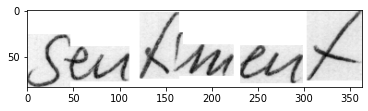

In [58]:
# View a sample image

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

sample_img = cv2.cvtColor(cv2.imread(parser_dataset.loc[500,'Path']),cv2.COLOR_BGR2GRAY)
print(sample_img.shape)
print(type(sample_img))
print('Actual Word: ',parser_dataset.loc[500,'Word'])
plt.imshow(sample_img,cmap = 'gray')

### **Function to process images and convert to size of** 32 * 128 

In [59]:
from __future__ import division
from __future__ import print_function

import random
import numpy as np
import cv2


def img_resize(image, imgSize):

  img = cv2.imread(image)
    
  # there are damaged files in IAM dataset - just use black image instead
  # If image is fine then convert to gray scale
  if img is None:
    img = np.zeros([imgSize[1], imgSize[0]])
  else:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
  # Convert to Gray Scale
  #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
  # Resize Images
  (target_height, target_width) = imgSize
  (h, w) = img.shape
  
  if h < target_height:
    add_ones = np.ones((target_height - h, w))*255
    img = np.concatenate((img, add_ones))
  (h, w) = img.shape
  if w < target_width:
    add_ones = np.ones((h, target_width-w))*255
    img = np.concatenate((img, add_ones), axis=1)
  if h > target_height or w > target_width:
    img = cv2.resize(img,(target_width,target_height))
  
  # Add Third Dimension
  img = np.expand_dims(img , axis = 2)
  
  # Normalize
  img = img/255
  
  return img

(32, 128, 1)


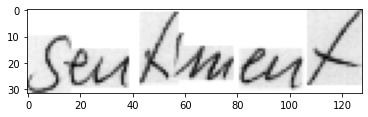

In [60]:
# Sample image resize

sample_image_updated = img_resize(parser_dataset.loc[500,'Path'],(32,128))
print(sample_image_updated.shape)
plt.imshow(np.squeeze(sample_image_updated),cmap = 'gray')

### **Convert all images to numpy array of size** 32 * 128
### **and store in an array**

#### **X_train**

In [61]:
images_dataset = []
image_path = X_train.Path.values.tolist()

(106, 450)


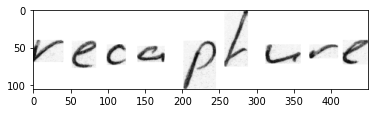

In [62]:
sample_img2 = cv2.cvtColor(cv2.imread(image_path[100]),cv2.COLOR_BGR2GRAY)
plt.imshow(sample_img2,cmap = 'gray')
print(sample_img2.shape)

(32, 128, 1)


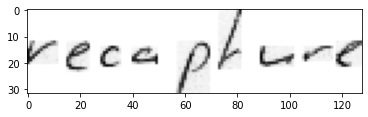

In [63]:
sample_img2_updated = img_resize(image_path[100],(32,128))
print(sample_img2_updated.shape)
plt.imshow(np.squeeze(sample_img2_updated),cmap = 'gray')

In [64]:
image_array_list_train = []
j = 0

for i in image_path:
  print(j, i)
  image_array_list_train.append(img_resize(i,(32,128)))
  j = j + 1

Streaming output truncated to the last 5000 lines.
3000 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a01/a01-007/a01-007-06-06.png
3001 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a03/a03-023/a03-023-09-00.png
3002 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a02/a02-037/a02-037-02-05.png
3003 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a01/a01-007u/a01-007u-01-00.png
3004 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a05/a05-048/a05-048-00-00.png
3005 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a04/a04-047/a04-047-01-01.png
3006 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a03/a03-023/a03-023-06-01.png
3007 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a04/a04-039/a04-039-05-03.png
3008 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a03/a03-034/a03-034-01-03.png
3009 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a01/a01-132/a01-132-06-04.png
3010 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/word

In [65]:
image_array_train = np.asarray(image_array_list_train).astype(np.float32)
image_array_train.shape

(8000, 32, 128, 1)

In [66]:
image_array_train[0]

array([[[0.98039216],
        [0.9764706 ],
        [0.98039216],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[0.98039216],
        [0.96862745],
        [0.9490196 ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[0.9764706 ],
        [0.972549  ],
        [0.9607843 ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       ...,

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]]], dtype=float32)

In [67]:
from pickle import dump,load
import os
os.system('rm /content/gdrive/MyDrive/Mid_Term_Project_Inputs/train_images.pkl')
dump(image_array_train, open('/content/gdrive/MyDrive/Mid_Term_Project_Inputs/train_images.pkl', 'wb'))

In [68]:
'''
file2 = open('/content/gdrive/MyDrive/Mid_Term_Project_Inputs/train_images.pkl','rb')
image_array_train = load(file2)
file2.close()
'''

"\nfile2 = open('/content/gdrive/MyDrive/Mid_Term_Project_Inputs/train_images.pkl','rb')\nimage_array_train = load(file2)\nfile2.close()\n"

#### **X_test**

In [69]:
images_dataset = []
image_path = X_test.Path.values.tolist()

In [70]:
image_array_list_test = []
j = 0

for i in image_path:
  print(j,i)
  image_array_list_test.append(img_resize(i,(32,128)))
  j = j + 1

0 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a05/a05-009/a05-009-03-03.png
1 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a01/a01-020u/a01-020u-01-04.png
2 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a01/a01-063u/a01-063u-06-03.png
3 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a02/a02-120/a02-120-06-06.png
4 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a01/a01-063/a01-063-09-00.png
5 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a04/a04-039/a04-039-09-07.png
6 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a02/a02-093/a02-093-02-07.png
7 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a03/a03-027/a03-027-06-01.png
8 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a01/a01-077/a01-077-01-07.png
9 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a01/a01-113u/a01-113u-04-03.png
10 /content/gdrive/MyDrive/Mid_Term_Project_Inputs/words/a01/a01-026u/a01-026u-00-01.png
11 /content/gdrive/MyDrive/Mid_Term_Project_I

In [71]:
image_array_test = np.asarray(image_array_list_test).astype(np.float32)
image_array_test.shape

(2000, 32, 128, 1)

In [72]:
image_array_test[0]

array([[[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       ...,

       [[0.9843137 ],
        [0.9607843 ],
        [0.80784315],
        ...,
        [0.36862746],
        [0.54509807],
        [0.9529412 ]],

       [[0.9843137 ],
        [0.96862745],
        [0.9647059 ],
        ...,
        [0.48235294],
        [0.8627451 ],
        [0.98039216]],

       [[0.98039216],
        [0.98039216],
        [0.96862745],
        ...,
        [0.8784314 ],
        [0.9607843 ],
        [0.98039216]]], dtype=float32)

In [73]:
import os
os.system('rm /content/gdrive/MyDrive/Mid_Term_Project_Inputs/test_images.pkl')
dump(image_array_test, open('/content/gdrive/MyDrive/Mid_Term_Project_Inputs/test_images.pkl', 'wb'))

In [74]:
'''
file2 = open('/content/gdrive/MyDrive/Mid_Term_Project_Inputs/test_images.pkl','rb')
image_array_test = load(file2)
file2.close()
'''

"\nfile2 = open('/content/gdrive/MyDrive/Mid_Term_Project_Inputs/test_images.pkl','rb')\nimage_array_test = load(file2)\nfile2.close()\n"

# **Build Model**

### Reference - https://theailearner.com/2019-05-29/creating-a-crnn-model-to-recognize-text-in-an-image-part-2

In [75]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Input, MaxPool2D, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [76]:
# input with shape of height=32 and width=128 
inputs = Input(shape=(32,128,1))
 
# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
 
conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)
 
conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)
 
conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)
# poolig layer with kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
 
conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)
# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)
 
conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
 
conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)
 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
 
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(blstm_1)
 
outputs = Dense(len_vocab+1, activation = 'softmax')(blstm_2)
 
act_model = Model(inputs, outputs)

In [77]:
'''
model = Sequential()

input_shape = (32,128,1)

# Layer 1
model.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape = input_shape, name = 'conv_1'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, name = 'pool_1'))

# Layer 2
model.add(Conv2D(128, (3,3), activation = 'relu', padding='same', name = 'conv_2'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, name = 'pool_2'))

# Layer 3
model.add(Conv2D(256, (3,3), activation = 'relu', padding='same', name = 'conv_3'))

# Layer 4
model.add(Conv2D(256, (3,3), activation = 'relu', padding='same', name = 'conv_4'))
model.add(MaxPool2D(pool_size=(2, 1), name = 'pool_4'))

# Layer 5
model.add(Conv2D(512, (3,3), activation = 'relu', padding='same', name = 'conv_5'))
model.add(BatchNormalization(name = 'batch_norm_5'))

# Layer 6
model.add(Conv2D(512, (3,3), activation = 'relu', padding='same', name = 'conv_6'))
model.add(BatchNormalization(name = 'batch_norm_6'))
model.add(MaxPool2D(pool_size=(2, 1), name = 'pool_6'))

# Layer 7
model.add(Conv2D(512, (2,2), activation = 'relu', name = 'conv_7'))

# Layer 8
model.add(Lambda(lambda x: K.squeeze(x, 1)))

# bidirectional LSTM layers with units=128
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2), name = 'blstm_1'))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2), name = 'blstm_2'))

# Output Layer
model.add(Dense(len_vocab+1, activation = 'softmax', name = 'output'))
'''

"\nmodel = Sequential()\n\ninput_shape = (32,128,1)\n\n# Layer 1\nmodel.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape = input_shape, name = 'conv_1'))\nmodel.add(MaxPool2D(pool_size=(2, 2), strides=2, name = 'pool_1'))\n\n# Layer 2\nmodel.add(Conv2D(128, (3,3), activation = 'relu', padding='same', name = 'conv_2'))\nmodel.add(MaxPool2D(pool_size=(2, 2), strides=2, name = 'pool_2'))\n\n# Layer 3\nmodel.add(Conv2D(256, (3,3), activation = 'relu', padding='same', name = 'conv_3'))\n\n# Layer 4\nmodel.add(Conv2D(256, (3,3), activation = 'relu', padding='same', name = 'conv_4'))\nmodel.add(MaxPool2D(pool_size=(2, 1), name = 'pool_4'))\n\n# Layer 5\nmodel.add(Conv2D(512, (3,3), activation = 'relu', padding='same', name = 'conv_5'))\nmodel.add(BatchNormalization(name = 'batch_norm_5'))\n\n# Layer 6\nmodel.add(Conv2D(512, (3,3), activation = 'relu', padding='same', name = 'conv_6'))\nmodel.add(BatchNormalization(name = 'batch_norm_6'))\nmodel.add(MaxPool2D(pool_size=(2

In [78]:
def ctc_lambda_func(args):
  y_pred, labels, input_length, label_length = args
  return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [79]:
labels = Input(name='the_labels', shape=[max_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

print(input_length)
print(label_length)

Tensor("input_length:0", shape=(None, 1), dtype=int64)
Tensor("label_length:0", shape=(None, 1), dtype=int64)


In [80]:
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

In [81]:
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [82]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')
 
filepath='/content/gdrive/MyDrive/Mid_Term_Project_Inputs/best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [83]:
print('image_array_train: ' , type(image_array_train))
print('padded_encoded_word_arr_train: ',type(padded_encoded_word_arr_train))
print('image_array_test: ' , type(image_array_test))
print('padded_encoded_word_arr_test: ',type(padded_encoded_word_arr_test))

image_array_train:  <class 'numpy.ndarray'>
padded_encoded_word_arr_train:  <class 'numpy.ndarray'>
image_array_test:  <class 'numpy.ndarray'>
padded_encoded_word_arr_test:  <class 'numpy.ndarray'>


In [84]:
print('image_array_train Shape: ' , image_array_train.shape)
print('padded_encoded_word_arr_train Shape: ',padded_encoded_word_arr_train.shape)
print('image_array_test Shape: ' , image_array_test.shape)
print('padded_encoded_word_arr_test Shape: ',padded_encoded_word_arr_test.shape)

image_array_train Shape:  (8000, 32, 128, 1)
padded_encoded_word_arr_train Shape:  (8000, 16)
image_array_test Shape:  (2000, 32, 128, 1)
padded_encoded_word_arr_test Shape:  (2000, 16)


In [85]:
# model.fit(X_train, y_train, batch_size=500, epochs=10, validation_split=0.2)
'''
model.fit([X_train, y_train], [y_train, X_train], batch_size=256, epochs = 100, 
          validation_data = ([X_test, y_test], [y_test, X_test]), callbacks = callbacks_list)
'''

'\nmodel.fit([X_train, y_train], [y_train, X_train], batch_size=256, epochs = 100, \n          validation_data = ([X_test, y_test], [y_test, X_test]), callbacks = callbacks_list)\n'

In [86]:
train_input_length = np.array([31]*8000).astype(np.float32)
valid_input_length = np.array([31]*2000).astype(np.float32)

In [87]:
train_label_length = y_train.iloc[ : ,1]
valid_label_length = y_test.iloc[ : ,1]
print(train_label_length.head())
print(valid_label_length.head())

0     2
1    11
2     5
3     3
4     3
Name: Word_Len, dtype: int64
0    8
1    3
2    7
3    1
4    4
Name: Word_Len, dtype: int64


In [88]:
train_label_length = np.array(train_input_length).astype(np.float32)
valid_input_length = np.array(valid_input_length).astype(np.float32)

In [89]:
model.fit(x=[image_array_train, padded_encoded_word_arr_train, train_input_length, train_label_length], y=np.zeros(8000), batch_size=256, epochs = 100, 
          validation_data = ([image_array_test, padded_encoded_word_arr_test, valid_input_length, valid_label_length], [np.zeros(2000)]), verbose = 1, callbacks = callbacks_list)

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 24.2625
Epoch 00001: val_loss improved from inf to 17.13786, saving model to /content/gdrive/MyDrive/Mid_Term_Project_Inputs/best_model.hdf5
32/32 [==============================] - 13s 391ms/step - loss: 24.2625 - val_loss: 17.1379
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 16.6973
Epoch 00002: val_loss improved from 17.13786 to 16.88733, saving model to /content/gdrive/MyDrive/Mid_Term_Project_Inputs/best_model.hdf5
32/32 [==============================] - 10s 304ms/step - loss: 16.6973 - val_loss: 16.8873
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 16.0591
Epoch 00003: val_loss did not improve from 16.88733
32/32 [==============================] - 9s 276ms/step - loss: 16.0591 - val_loss: 18.2089
Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 15.2504
Epoch 00004: val_loss did not improve from 16.88733
32/32 [==============================] - 9

In [96]:
# load the saved best model weights
act_model.load_weights('/content/gdrive/MyDrive/Mid_Term_Project_Inputs/best_model.hdf5')
 
# predict outputs on validation images
prediction = act_model.predict(image_array_test)
 
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
 
# see the results
i = 0
for x in out:
    print(y_test.iloc[i,0])
    for p in x:  
        if int(p) != -1:
            print(vocab[int(p)], end = '')       
    print('\n')
    i+=1

print('Total: ', i)

Streaming output truncated to the last 5000 lines.

supplies
applies

from
from

is
in

more
moe

gossip
gossiig

opposition
goposition

he
he

man
mhn

held
held

far
fos

the
the

a
a

in
in

,
,

Federation
Sederation

alone
atone

the
the

forward
forarard

Service
Service

Senator
Senutor

necessary
recessary

members
menbers

real
neal

on
a

to
to

Federal
Federal

-
-

.
.

Short
Sort

will
will

of
of

office
offfce

decided
decided

for
to

four
fom

Washington
waaahington

night
nugght

A
I

Colonial
Coloricl

it
i

sunning
seining

on
on

with
ceith

the
the

of
of

other
dtr

process
process

considered
considered

Investigation
hestigatios

while
while

would
would

Common
Common

miles
miles

to
to

which
whih

audience
aundionce

Party
Parnty

the
the

.
.

more
me

bound
bouud

nothing
wting

these
these

hour's
hovrs

summoned
summared

most
musst

avoid
awoid

received
recerved

President
President

Dean
Pean

the
the

would
would

the
the

House
House

the
the

Pres